In [1]:
#import libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scanpy as sc
from matplotlib.pyplot import rc_context
import matplotlib as mpl
import os

# Directory path
myDir = "/Users/junjie/Desktop/OneDrive - The University of Chicago (1)/Python/revision_figure/"
os.chdir(myDir)

#*****
mpl.rcdefaults()
# Set font to be arial
mpl.rc('font', **{'sans-serif':'Arial', 'size':12})
mpl.rcParams['mathtext.rm'] = 'sans' # to have non-italic greek letter, use r'$\mathrm{\alpha}$', does NOT work with f-string
mpl.rcParams['axes.titlesize'] = 12
# Set default tick size
mpl.rcParams['xtick.major.size'] = 5.5
mpl.rcParams['ytick.major.size'] = 5.5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['ytick.minor.size'] = 2.5
# Default legend settings
mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.edgecolor'] = 'k'

#to store text as text, not as path
new_rc_params = {'text.usetex': False,
                 "svg.fonttype": 'none'}
mpl.rcParams.update(new_rc_params)

# *****Custom Prox-seq functions and classes*****
import ProxseqClasses1 as PC

In [2]:
# Set parameters for the protein complexes (cell type 1) ;8000 protein1, 5000 protein2, 8000 protein3
num_complex = np.zeros((3,3))
num_complex[0,0] = 2000
num_complex[0,1] = 500
num_complex[1,0] = 500

# Set parameters for the non-interacting proteins
probeA = [2500,2000,4000]
probeB = [2500,2000,4000]

non_specific_prob_A = non_specific_prob_B = [0.2, 0.1, 0.05]
sim1 = PC.simulatePLA(protein_variance=True, mode = '2D', seed_num=1)
sim1.simulate(num_complex, probeA, probeB, non_specific_prob_A, non_specific_prob_B)

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=1.
2023-12-07 13:32:23     Start simulation
2023-12-07 13:32:33     Processed     10 cells
2023-12-07 13:32:40     Processed     20 cells
2023-12-07 13:32:45     Processed     30 cells
2023-12-07 13:32:58     Processed     40 cells
2023-12-07 13:33:11     Processed     50 cells
2023-12-07 13:33:21     Processed     60 cells
2023-12-07 13:33:28     Processed     70 cells
2023-12-07 13:33:34     Processed     80 cells
2023-12-07 13:33:46     Processed     90 cells
2023-12-07 13:34:00     Processed    100 cells


In [3]:
# Set parameters for the protein complexes (cell type 2) 8000 protein1, 5000 protein2, 8000 protein3
num_complex = np.zeros((3,3))
num_complex[1,2] = 2000
num_complex[2,1] = 2000

# Set parameters for the non-interacting proteins
probeA = [5000,500,2000]
probeB = [5000,500,2000]

non_specific_prob_A = non_specific_prob_B = [0.2, 0.1, 0.05]
sim2 = PC.simulatePLA(protein_variance=True, mode = '2D', seed_num=10)
sim2.simulate(num_complex, probeA, probeB, non_specific_prob_A, non_specific_prob_B )

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=10.
2023-12-07 13:34:09     Start simulation
2023-12-07 13:34:24     Processed     10 cells
2023-12-07 13:34:33     Processed     20 cells
2023-12-07 13:34:40     Processed     30 cells
2023-12-07 13:34:59     Processed     40 cells
2023-12-07 13:35:06     Processed     50 cells
2023-12-07 13:35:13     Processed     60 cells
2023-12-07 13:35:21     Processed     70 cells
2023-12-07 13:35:28     Processed     80 cells
2023-12-07 13:35:37     Processed     90 cells
2023-12-07 13:35:43     Processed    100 cells


In [4]:
# Set parameters for the protein complexes (cell type 3) 10000 protein1, 5000 protein2, 8000 protein3
num_complex = np.zeros((3,3))
num_complex[0,0] = 3000
num_complex[0,2] = 1000
num_complex[2,0] = 1000

# Set parameters for the non-interacting proteins
probeA = [1000,2500,3000]
probeB = [1000,2500,3000]

non_specific_prob_A = non_specific_prob_B = [0.2, 0.1, 0.05]
sim3 = PC.simulatePLA(protein_variance=True, mode = '2D', seed_num=100)
sim3.simulate(num_complex, probeA, probeB, non_specific_prob_A, non_specific_prob_B )

cell_d=10000. PLA_dist=50.
protein_variance=True. Negative binomial: n=1.5. seed_num=100.
2023-12-07 13:37:33     Start simulation
2023-12-07 13:37:40     Processed     10 cells
2023-12-07 13:37:48     Processed     20 cells
2023-12-07 13:37:55     Processed     30 cells
2023-12-07 13:38:04     Processed     40 cells
2023-12-07 13:38:14     Processed     50 cells
2023-12-07 13:38:22     Processed     60 cells
2023-12-07 13:38:29     Processed     70 cells
2023-12-07 13:38:40     Processed     80 cells
2023-12-07 13:38:46     Processed     90 cells
2023-12-07 13:38:51     Processed    100 cells


In [30]:
pla1 = PC.plaObject(sim1.pla_count)
pla2 = PC.plaObject(sim2.pla_count)
pla3 = PC.plaObject(sim3.pla_count)

In [31]:
pla1.calculateProteinCount()
pla2.calculateProteinCount()
pla3.calculateProteinCount()

In [32]:
adata1 = sc.AnnData(X=pla1.protein_count.transpose())
adata2 = sc.AnnData(X=pla2.protein_count.transpose())
adata3 = sc.AnnData(X=pla3.protein_count.transpose())
adata1.obs['type'] = 'type1'
adata2.obs['type'] = 'type2'
adata3.obs['type'] = 'type3'
adata = sc.concat([adata1, adata2, adata3])

/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [44]:
adata1 = sc.AnnData(X=sim1.pla_count.transpose())
adata2 = sc.AnnData(X=sim2.pla_count.transpose())
adata3 = sc.AnnData(X=sim3.pla_count.transpose())
adata1.obs['type'] = 'type1'
adata2.obs['type'] = 'type2'
adata3.obs['type'] = 'type3'
adata = sc.concat([adata1, adata2, adata3])

/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [45]:
adata.layers["counts"] = adata.X.copy() # preserve counts
sc.pp.normalize_total(adata, target_sum=1e4) # scale each cell to a common library size
sc.pp.log1p(adata) # log(expression + 1)
adata.raw = adata # freeze the state in `.raw`
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

In [46]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)

In [47]:
sc.tl.leiden(adata,key_added='clusters',resolution=0.2)

In [48]:
with plt.rc_context({'figure.figsize': (3, 3)}):
    sc.pl.umap(adata, color=['clusters','type'], add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,
               title=['clustering of cells', 'cell types'], palette='Set1', show=False)
    plt.savefig(myDir+"new_cell_clustering.svg",
                bbox_inches='tight', pad_inches=0)

/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots

In [53]:
with plt.rc_context({'figure.figsize': (2.5, 2.5)}):
    sc.pl.umap(adata, color=['1:1', '1:2', '1:3', '2:1', '2:2', '2:3', '3:1', '3:2', '3:3'], s=50, frameon=False, ncols=3, vmax='p99', show=False)
    plt.savefig(myDir+"new_cell_clustering2.svg",
                bbox_inches='tight', pad_inches=0)

In [54]:
marker_genes_dict = {
    'type 1': ['1:2', '2:1', '1:1'],
    'type 2': ['2:3', '3:2'],
    'type 3': ['1:3', '3:1', '1:1']
}

In [55]:
with plt.rc_context({'figure.figsize': (5, 5)}):
    sc.pl.dotplot(adata, marker_genes_dict, 'clusters', dendrogram=True, show=False)
    plt.savefig(myDir+"new_cell_clustering3.svg",
                bbox_inches='tight', pad_inches=0)

categories: 0, 1, 2
var_group_labels: type 1, type 2, type 3


/Users/junjie/anaconda3/envs/scanpy_Prox-seq/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


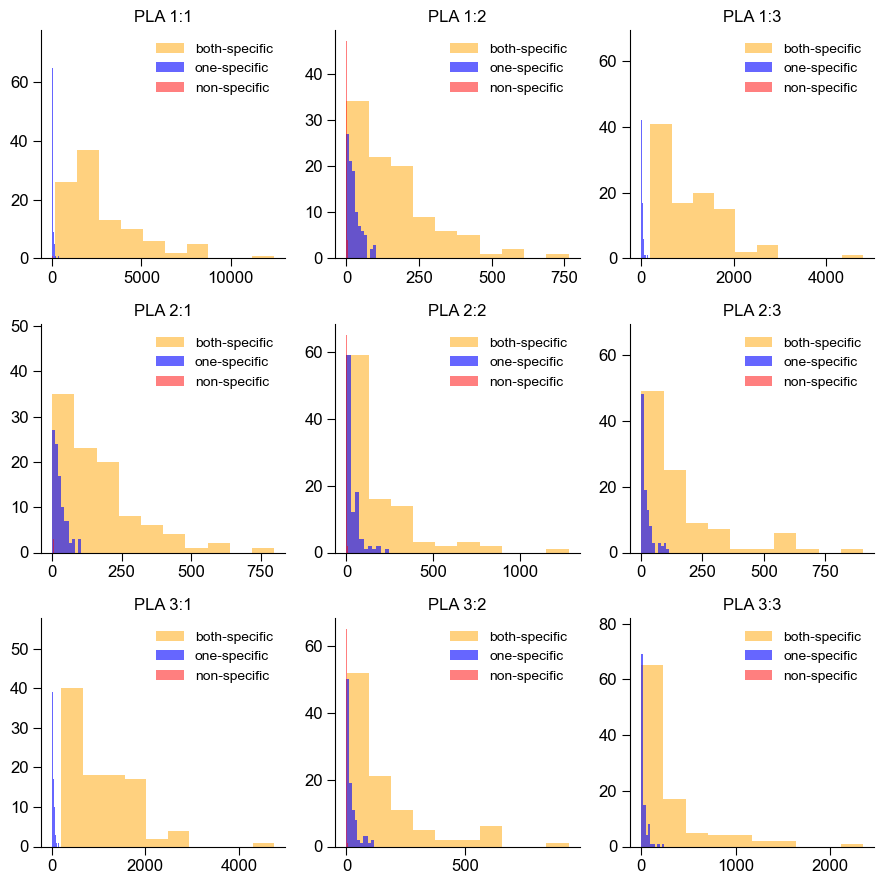

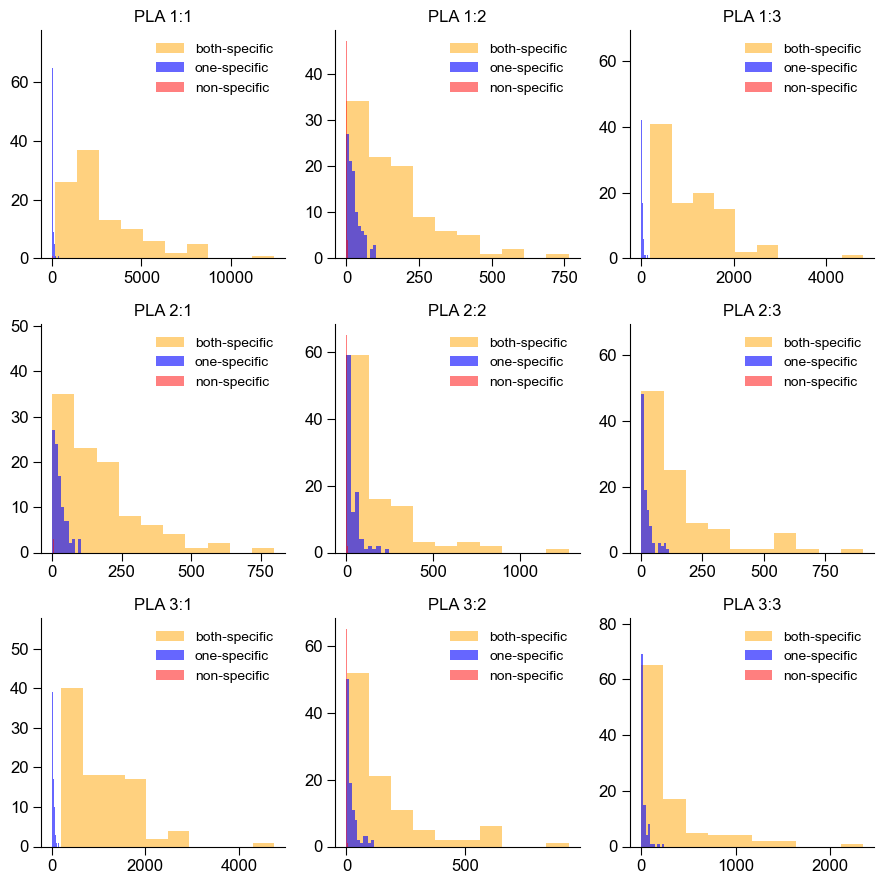

In [43]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(9,9))

my_pla = ['1:1', '1:2', '1:3', '2:1', '2:2', '2:3', '3:1', '3:2', '3:3']
for counter, pla in enumerate(my_pla):
    # Calculate the row and column indices for the subplot
    row = counter // 3
    col = counter % 3
    
    probeA, probeB = pla.split(':')

    # Plot the histograms for the current PLA
    ax[row,col].hist(sim3.pla_specific.loc[pla, :], label='both-specific', alpha=0.5, color='orange')
    ax[row,col].hist(sim3.pla_one_specific.loc[f'{probeA}_nsA:{probeB}', :] + sim3.pla_one_specific.loc[f'{probeA}:{probeB}_nsB', :], color='blue', label='one-specific', alpha=0.6)
    ax[row,col].hist(sim3.pla_non_specific.loc[f'{probeA}_nsA:{probeB}_nsB', :], color='red', label='non-specific', alpha=0.5)
    ax[row,col].set_title(f'PLA {pla}')
    ax[row,col].legend(frameon=False, loc='upper right', markerscale=0.5, fontsize='small')

sns.despine(fig=fig)
fig.tight_layout()
plt.show()
#fig.savefig(myDir+"nonspecific.svg",
                #bbox_inches='tight', pad_inches=0)